<a href="https://colab.research.google.com/github/AnupKumarGupta/Machine-Learning-Lab-Assignments/blob/master/Tiatanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd 
import numpy as np


dataFrameTrain = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset_SVM/train.csv")
dataFrameTest = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset_SVM/test.csv")

In [3]:
if 'PassengerId' in dataFrameTrain.columns: #To resolve errors, if the columns are already dropped
    dataFrameTrain = dataFrameTrain.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
if 'PassengerId' in dataFrameTest.columns:
    dataFrameTest = dataFrameTest.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])    

print(dataFrameTrain.isna().any())
# Age and Embarked have null values in training data
print(dataFrameTest.isna().any())
# Age and Fare have null values in training data

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool


In [0]:
X = dataFrameTrain.loc[:, dataFrameTrain.columns != 'Survived'].values
Y = dataFrameTrain.loc[:, dataFrameTrain.columns == 'Survived'].values
X_unseen = dataFrameTest.loc[:, dataFrameTest.columns != 'Survived'].values

In [5]:
#Imputing Age by Mean for training data
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X[:,2:3])
X[:,2:3] = imp.transform(X[:,2:3])

#Imputing Age of testing data by mean of training data
meanAgeTrain = np.mean(X[:,2:3])
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=meanAgeTrain)
imp = imp.fit(X_unseen[:,2:3])
X_unseen[:,2:3] = imp.transform(X_unseen[:,2:3])

#Imputing Age of testing data by Mean of training data
meanFareTrain = np.mean(X[:,5:6])
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=meanAgeTrain)
imp = imp.fit(X_unseen[:,5:6])
X_unseen[:,5:6] = imp.transform(X_unseen[:,5:6])

#Imputing Embarked by Most Frequent Occurance for training data
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(X[:,6:])
X[:,6:] = imp.transform(X[:,6:])

#checking for NaN values
print(pd.DataFrame(X).isna().any())
print(pd.DataFrame(X_unseen).isna().any())

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool


In [0]:
# Encoding Sex for training data
labelEncoder = LabelEncoder()
labelEncoder.fit(X[:,1:2].ravel())
X[:,1:2] = labelEncoder.transform(X[:,1:2].ravel()).reshape(X[:,1:2].shape[0],1) 

# Encoding Sex for test data
labelEncoder.fit(X_unseen[:,1:2].ravel())
X_unseen[:,1:2] = labelEncoder.transform(X_unseen[:,1:2].ravel()).reshape(X_unseen[:,1:2].shape[0],1) 

In [0]:
#Encoding Embarkment for training data
labelEncoder = LabelEncoder()
labelEncoder.fit(X[:,6:].ravel())
X[:,6:] = labelEncoder.transform(X[:,6:].ravel()).reshape(X[:,6:].shape[0],1) 

#Encoding Embarkment for test data
labelEncoder.fit(X_unseen[:,6:].ravel())
X_unseen[:,6:] = labelEncoder.transform(X_unseen[:,6:].ravel()).reshape(X_unseen[:,6:].shape[0],1) 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

True Positive: 29, True Negative: 147, False Positive: 10, False Negative: 82 
Precision 0.7435897435897436, Recall 0.26126126126126126, Accuracy 0.6567164179104478


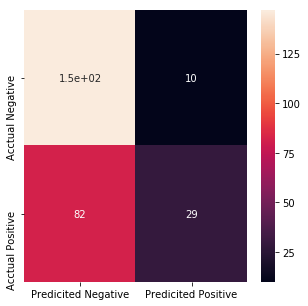

In [13]:
# Using RBF Kernel SVM model
kernel_svm = svm.SVC(kernel='rbf', gamma='scale')
kernel_svm.fit(X_train, y_train.ravel())
pred = [0] * (X_test.shape[0])
for row in range(X_test.shape[0]):  
  pred[row] = (kernel_svm.predict(X_test[row].reshape(1, -1)))
confusion_matrix_array = confusion_matrix(y_test, pred)
TN, FP, FN, TP =confusion_matrix_array.ravel()
df_cm = pd.DataFrame(confusion_matrix_array, index = ["Acctual Negative","Acctual Positive"],
                  columns = ["Predicited Negative","Predicited Positive"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)
print("True Positive: {0}, True Negative: {1}, False Positive: {2}, False Negative: {3} ".format(TP,TN,FP,FN))
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Precision {0}, Recall {1}, Accuracy {2}".format(precision,recall,accuracy))

True Positive: 12, True Negative: 152, False Positive: 5, False Negative: 99 
Precision 0.7058823529411765, Recall 0.10810810810810811, Accuracy 0.6119402985074627


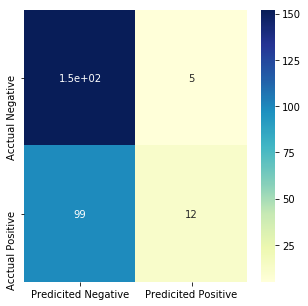

In [14]:
# Using RBF Kernel SVM model
kernel_svm = svm.SVC(kernel='poly', gamma='scale')
kernel_svm.fit(X_train, y_train.ravel())
pred = [0] * (X_test.shape[0])
for row in range(X_test.shape[0]):  
  pred[row] = (kernel_svm.predict(X_test[row].reshape(1, -1)))
confusion_matrix_array = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(confusion_matrix_array, index = ["Acctual Negative","Acctual Positive"],
                  columns = ["Predicited Negative","Predicited Positive"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm,cmap="YlGnBu", annot=True)
TN, FP, FN, TP =confusion_matrix_array.ravel()
print("True Positive: {0}, True Negative: {1}, False Positive: {2}, False Negative: {3} ".format(TP,TN,FP,FN))
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Precision {0}, Recall {1}, Accuracy {2}".format(precision,recall,accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


True Positive: 97, True Negative: 116, False Positive: 41, False Negative: 14 
Precision 0.7028985507246377, Recall 0.8738738738738738, Accuracy 0.7947761194029851


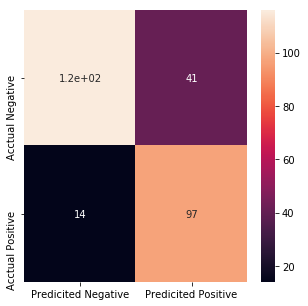

In [15]:
# Using Linear SVM model
linear_svm = svm.LinearSVC(max_iter=2000)
linear_svm.fit(X_train, y_train.ravel())
pred = [0] * (X_test.shape[0])
for row in range(X_test.shape[0]):  
  pred[row] = (linear_svm.predict(X_test[row].reshape(1, -1)))
confusion_matrix_array = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(confusion_matrix_array, index = ["Acctual Negative","Acctual Positive"],
                  columns = ["Predicited Negative","Predicited Positive"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)
TN, FP, FN, TP =confusion_matrix_array.ravel()
print("True Positive: {0}, True Negative: {1}, False Positive: {2}, False Negative: {3} ".format(TP,TN,FP,FN))
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Precision {0}, Recall {1}, Accuracy {2}".format(precision,recall,accuracy))

True Positive: 97, True Negative: 116, False Positive: 41, False Negative: 14 
Precision 0.7028985507246377, Recall 0.8738738738738738, Accuracy 0.7947761194029851


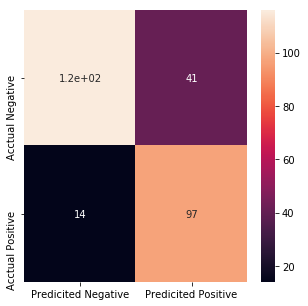

In [16]:
# Using Logistic Regression model (Solver - Newton-CG)
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_train, y_train.ravel())
pred = [0] * (X_test.shape[0])
for row in range(X_test.shape[0]):  
  pred[row] = (linear_svm.predict(X_test[row].reshape(1, -1)))
confusion_matrix_array = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(confusion_matrix_array, index = ["Acctual Negative","Acctual Positive"],
                  columns = ["Predicited Negative","Predicited Positive"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)
TN, FP, FN, TP =confusion_matrix_array.ravel()
print("True Positive: {0}, True Negative: {1}, False Positive: {2}, False Negative: {3} ".format(TP,TN,FP,FN))
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Precision {0}, Recall {1}, Accuracy {2}".format(precision,recall,accuracy))